In [11]:
# 1. Import
from kicad_draw.models import HelixParams
from kicad_draw.PCBmodule import PCBdraw

In [12]:
# 2. Parameter setting
params = HelixParams(
    x0=150.0,
    y0=100.0,
    radius=11.0,
    port_gap=0.65,
    tab_gap=0.55,
    angle_step=0.0,
    layer_index_list=[0, 1, 2, 3, 4, 5],
    track_width=0.5,
    connect_width=0.2,
    drill_size=0.2,
    via_size=0.4,
    net_number=1,
    segment_number=100,
)

In [13]:
# 3. Draw
pcb = PCBdraw(stackup="default_6layer", mode="file")
pcb.draw_helix(params)

# 4. Export
s_expressions = pcb.export()
print("KiCad s-expressions (copy to your .kicad_pcb file):")
print(s_expressions)

# Optional: save to file
pcb.save("circular_helix_coil.kicad_pcb")
print(f"\nSaved {len(pcb.elements)} elements to circular_helix_coil.kicad_pcb")

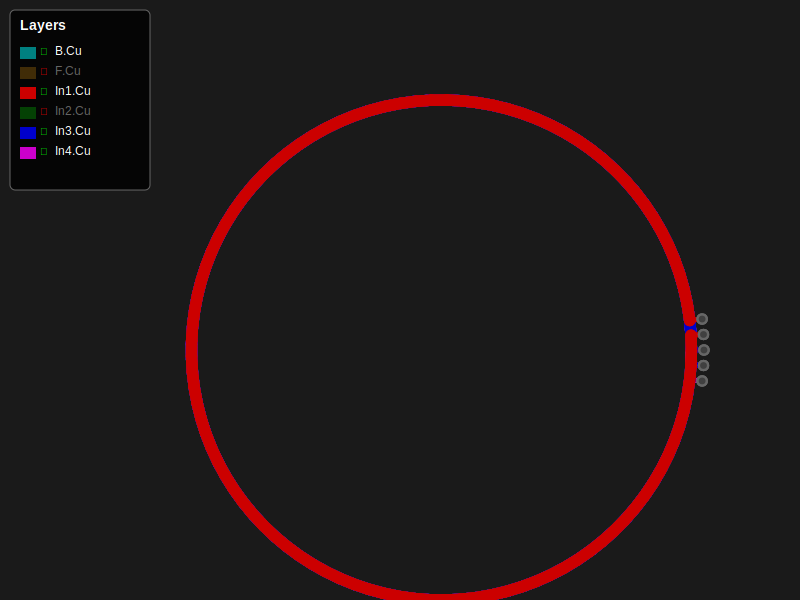

In [15]:
# 5. Visualization
visible_layers = [
    #    0,
    1,
    #    2,
    3,
    4,
    5,
]  # Edit this list: 0=F.Cu, 1=In1.Cu, 2=In2.Cu, 3=In3.Cu, 4=In4.Cu, 5=B.Cu
show_vias = True

# Get SVG visualization
svg_content = pcb.visualize(visible_layers=visible_layers, show_vias=show_vias)

# Display in Jupyter
try:
    from IPython.display import SVG, display

    display(SVG(svg_content))
except ImportError:
    print("SVG content (save to .svg file to view):")
    print(svg_content[:200] + "..." if len(svg_content) > 200 else svg_content)